In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Data Exploration and Preprocessing

In [2]:
data = pd.read_csv('Alphabets_data.csv')
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [4]:
data.isnull().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


In [5]:
data.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [7]:
num_samples = data.shape[0]
num_features = data.shape[1]-1
print('Number of Samples :', num_samples)
print('Number of Features :',num_features)

Number of Samples : 20000
Number of Features : 16


In [8]:
classes = data['letter'].unique()
print('Classes :', classes)

Classes : ['T' 'I' 'D' 'N' 'G' 'S' 'B' 'A' 'J' 'M' 'X' 'O' 'R' 'F' 'C' 'H' 'W' 'L'
 'P' 'E' 'V' 'Y' 'Q' 'U' 'K' 'Z']


In [9]:
len(classes)

26

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
data['letter'] = le.fit_transform(data['letter'])
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [12]:
X = data.drop('letter',axis=1)
y = data['letter']

In [13]:
from sklearn.preprocessing import StandardScaler

In [15]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [16]:
# splitting data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

Building Neural Network

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
# creating model

model = keras.Sequential([
                          layers.Dense(32, activation='relu', input_shape=(num_features,)),
                          layers.Dense(32, activation='relu', input_shape=(num_features,)),
                          layers.Dense(len(classes), activation='softmax')
])

In [24]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 26)                  │             858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,458 (9.60 KB)

 Trainable params: 2,458 (9.60 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
weights,biases = model.layers[1].get_weights()


In [26]:
weights

array([[-0.24265479, -0.0620518 ,  0.28274706, ..., -0.08364761,
         0.3018237 ,  0.10914165],
       [-0.00234187, -0.0088191 , -0.00651062, ...,  0.21919343,
         0.11651704, -0.20704916],
       [-0.11401099, -0.02504215, -0.2734775 , ...,  0.14873025,
         0.14795753,  0.28943714],
       ...,
       [ 0.29901066,  0.16737309, -0.28599635, ...,  0.15516451,
         0.18406707,  0.04475397],
       [ 0.17208207,  0.21391246,  0.1195918 , ..., -0.0711    ,
        -0.27388883, -0.10549906],
       [-0.22791722, -0.24206597, -0.12850933, ...,  0.06614807,
        -0.07072842,  0.07742453]], dtype=float32)

In [27]:
weights.shape

(32, 32)

In [28]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [30]:
biases.shape

(32,)

In [31]:
# compiling model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
# training the model

model_train = model.fit(X_train, y_train,epochs=30,validation_split=0.2)

Epoch 1/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2028 - loss: 2.8179 - val_accuracy: 0.5847 - val_loss: 1.4848
Epoch 2/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6246 - loss: 1.3121 - val_accuracy: 0.7034 - val_loss: 1.0549
Epoch 3/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7237 - loss: 0.9603 - val_accuracy: 0.7484 - val_loss: 0.8916
Epoch 4/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7627 - loss: 0.8107 - val_accuracy: 0.7731 - val_loss: 0.7899
Epoch 5/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7845 - loss: 0.7367 - val_accuracy: 0.7869 - val_loss: 0.7341
Epoch 6/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8020 - loss: 0.6745 - val_accuracy: 0.8119 - val_loss: 0.6583
Epoch 7/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8242 - loss: 0.6009 - val_accuracy: 0.8166 - val_loss: 0.6218
Epoch 8/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8330 - loss: 0.5652 - val_accuracy: 0.

In [33]:
model_train.params

{'verbose': 'auto', 'epochs': 30, 'steps': 400}

In [34]:
model_train.history

{'accuracy': [0.3575781285762787,
  0.6517187356948853,
  0.7311718463897705,
  0.7653124928474426,
  0.7915624976158142,
  0.8081250190734863,
  0.8217187523841858,
  0.8331249952316284,
  0.8419530987739563,
  0.8508594036102295,
  0.8594531416893005,
  0.8639843463897705,
  0.8714843988418579,
  0.8728125095367432,
  0.8805468678474426,
  0.8850781321525574,
  0.8867968916893005,
  0.8907031416893005,
  0.8932031393051147,
  0.8944531083106995,
  0.8989062309265137,
  0.9010156393051147,
  0.90234375,
  0.9049218893051147,
  0.9085156321525574,
  0.9073437452316284,
  0.912890613079071,
  0.9133594036102295,
  0.9136718511581421,
  0.9163281321525574],
 'loss': [2.300712823867798,
  1.1980715990066528,
  0.9286095499992371,
  0.7996254563331604,
  0.7151257991790771,
  0.651506781578064,
  0.6015732288360596,
  0.5619492530822754,
  0.5279238820075989,
  0.4986768364906311,
  0.47211796045303345,
  0.4508002996444702,
  0.4311772882938385,
  0.4154358208179474,
  0.3997516334056854,

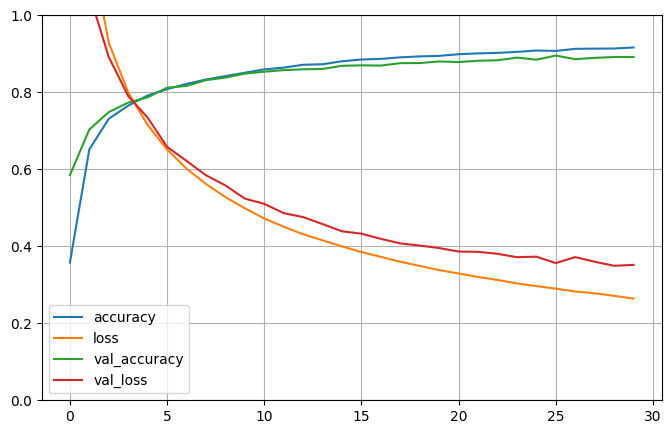

In [35]:
# visualization

pd.DataFrame(model_train.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [36]:
# evaluating model on test data
model.evaluate(X_test,y_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8986 - loss: 0.3190


[0.32808545231819153, 0.8977500200271606]

In [37]:
# make predictions

prediction = model.predict(X_test)
predicted_classes = np.argmax(prediction,axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Hyperparameter Tuning

In [38]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {
               'units' : [32,64,128],
               'activation' : ['relu','tanh'],

               'learning_rate' : [0.001,0.01]


}

In [44]:
def create_model(units=64, activation='relu', learning_rate=0.001):
    # Create a Sequential model
    model = keras.Sequential([
        layers.Dense(units, activation=activation, input_shape=(num_features,)),
        layers.Dense(units, activation=activation, input_shape=(num_features,)),
        layers.Dense(units, activation=activation, input_shape=(num_features,)),
        layers.Dense(len(classes), activation='softmax')  # Output layer
    ])

    # Compile the model with the specified learning rate
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [48]:
! pip install scikeras

In [49]:
from scikeras.wrappers import KerasClassifier

In [51]:
grid_search_model = KerasClassifier(build_fn=create_model, units = [32, 64,128], activation = ['relu', 'tanh'], learning_rate = [0.001, 0.01])

In [52]:
grid_search = GridSearchCV(estimator=grid_search_model, param_grid=param_grid, scoring='accuracy', cv=3)

In [53]:
grid_search_result = grid_search.fit(X_train,y_train)

334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1824 - loss: 2.8654
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
334/334 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2035 - loss: 2.8065
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1914 - loss: 2.8647
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3185 - loss: 2.4472
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3617 - loss: 2.3477
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3436 - loss: 2.4202
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
334/334 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4626 - loss: 2.0086
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
334/334 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4214 - loss: 2.0552
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4539 - loss: 1.96

In [54]:
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

Best parameters found: {'activation': 'tanh', 'learning_rate': 0.01, 'units': 64}


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [56]:
y_pred = grid_search.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [59]:
# Evaluate Model Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'\n Accuracy: {accuracy},\n Precision: {precision},\n Recall: {recall},\n F1 Score: {f1}')


 Accuracy: 0.8395,
 Precision: 0.8503583093075087,
 Recall: 0.8395,
 F1 Score: 0.8389368797599933
